# Chapter 5: Support Vector Machines - Notebook Reproduksi Kode

Bab ini mengeksplorasi Support Vector Machines (SVM), model yang kuat dan serbaguna
untuk klasifikasi linier dan non-linier, regresi, dan deteksi outlier.

Kita akan melihat:
- Klasifikasi SVM Linier (Hard Margin & Soft Margin)
- Klasifikasi SVM Non-Linier (Polynomial Kernel, Gaussian RBF Kernel)
- Regresi SVM
- Konsep dasar "Under the Hood" yang mendasari SVM

--- Klasifikasi SVM Linier ---
Melatih LinearSVC (C=1, hard margin) untuk deteksi Iris virginica...
LinearSVC C=1 berhasil dilatih.
Melatih LinearSVC (C=100, soft margin) untuk deteksi Iris virginica...
LinearSVC C=100 berhasil dilatih.
Prediksi untuk petal [5.5, 1.7] (Iris virginica): [1.]


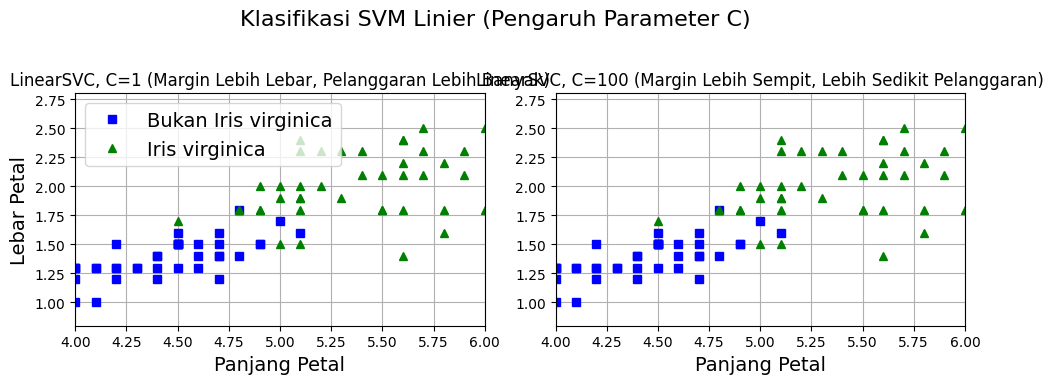


--- Klasifikasi SVM Non-Linier (PolynomialFeatures + LinearSVC) ---
SVM dengan fitur polinomial berhasil dilatih.


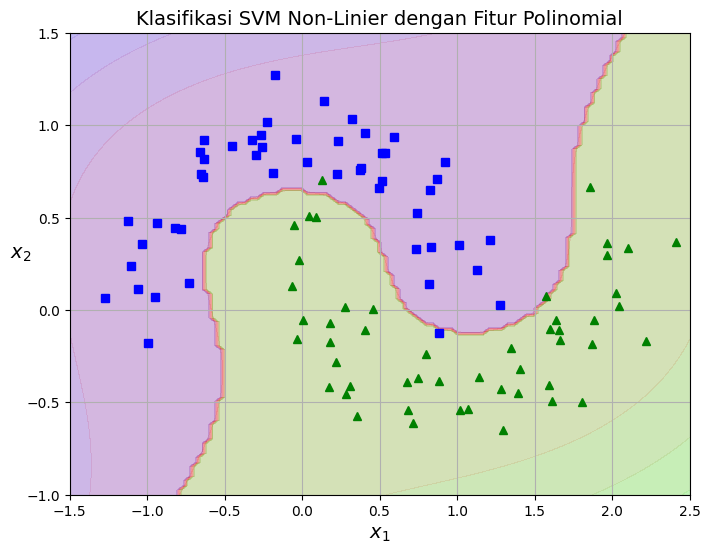


--- Klasifikasi SVM Non-Linier (Kernel Polinomial) ---
Melatih SVC dengan kernel polinomial degree 3...
SVC dengan kernel polinomial berhasil dilatih.


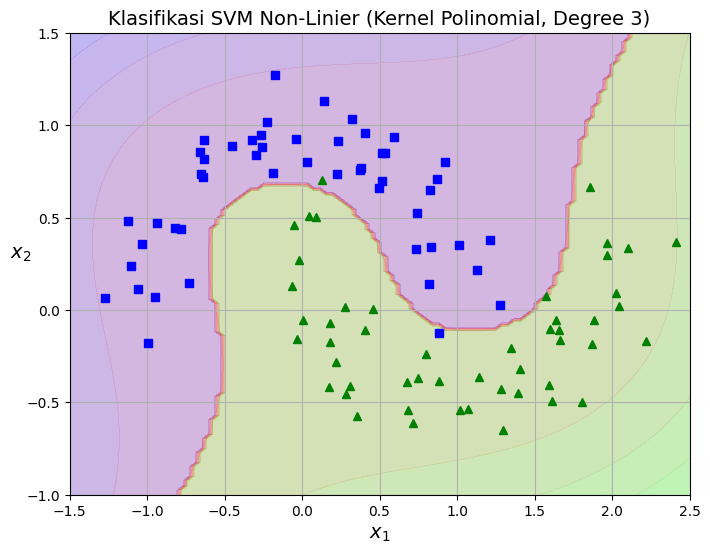

Melatih SVC dengan kernel polinomial degree 10, C=100...
SVC dengan kernel polinomial degree 10 berhasil dilatih.


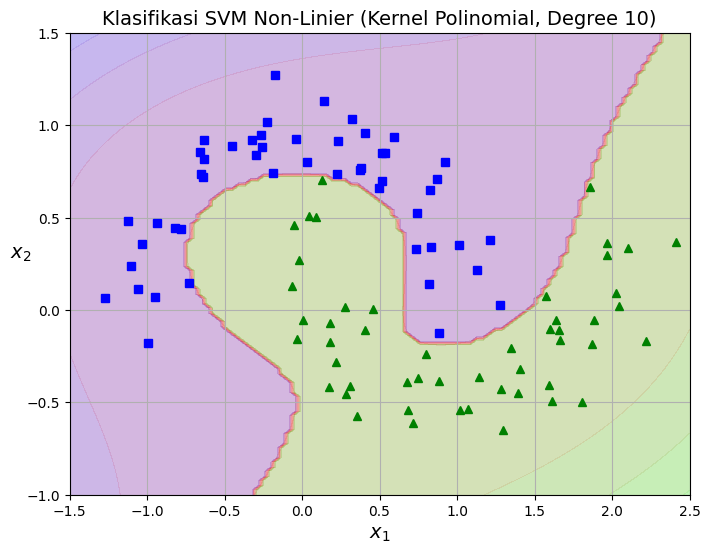


--- Klasifikasi SVM Non-Linier (Kernel Gaussian RBF) ---
Melatih SVC dengan kernel RBF (gamma=5, C=0.001)...
SVC dengan kernel RBF berhasil dilatih.


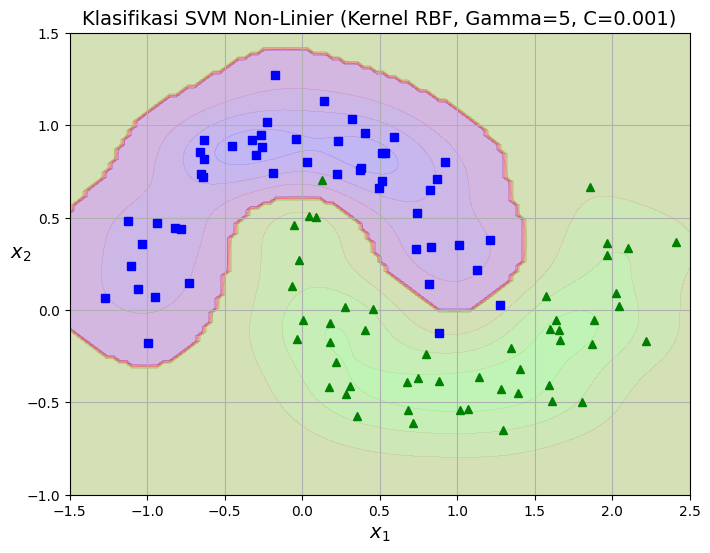

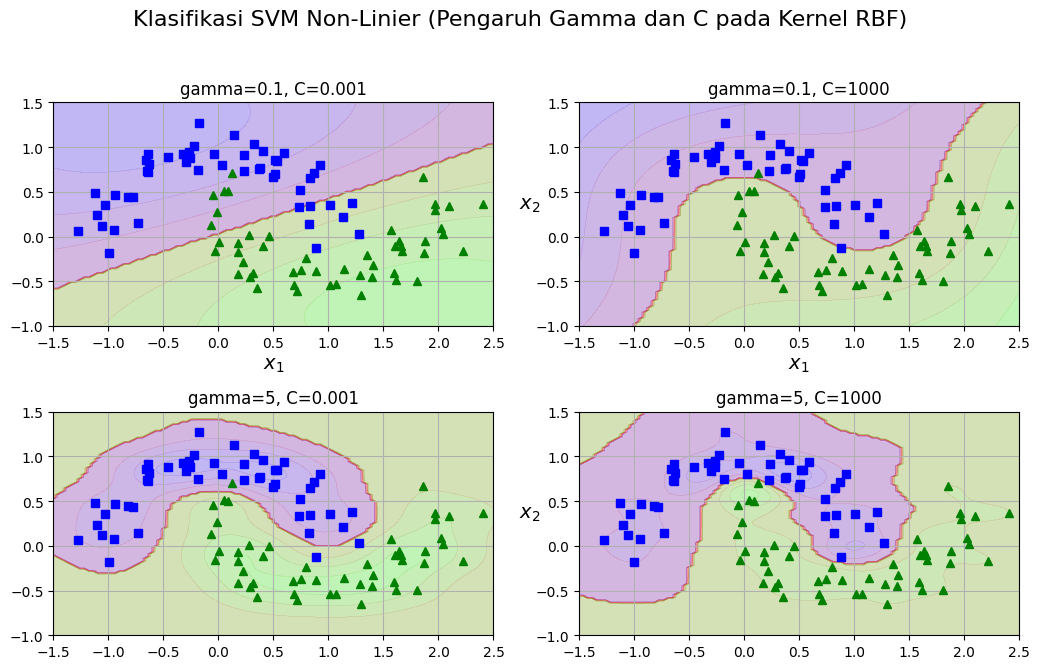


--- Regresi SVM Linier ---
Melatih LinearSVR (epsilon=1.5)...
LinearSVR berhasil dilatih.


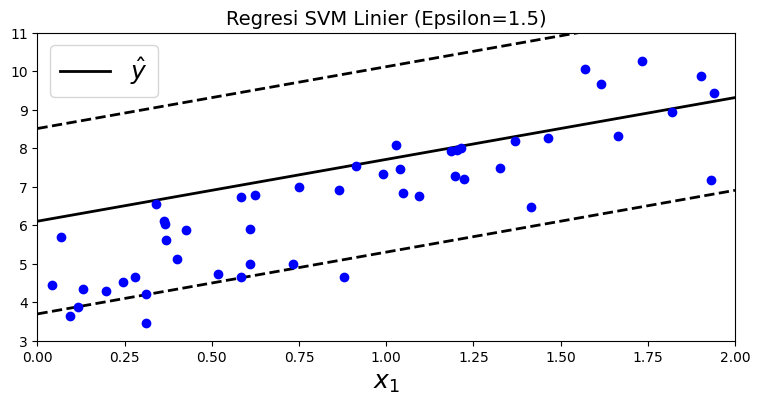

Melatih LinearSVR (epsilon=0.5)...
LinearSVR dengan epsilon kecil berhasil dilatih.


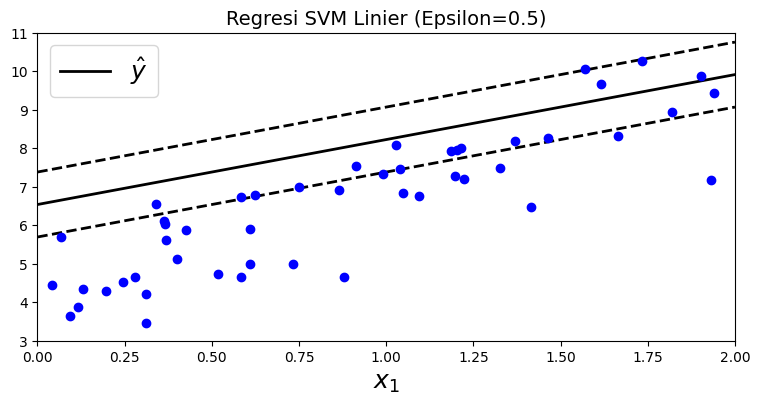


--- Regresi SVM Non-Linier (Kernel Polinomial) ---
Melatih SVR (kernel='poly', degree=2, C=100, epsilon=0.1)...
SVR dengan kernel polinomial berhasil dilatih.


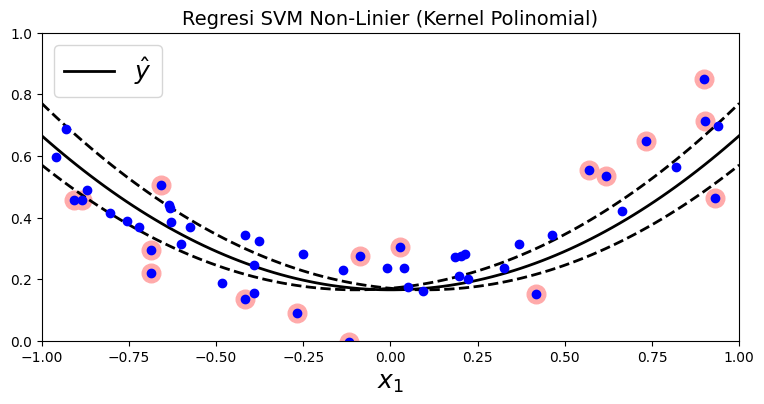

Melatih SVR (kernel='poly', degree=2, C=0.01, epsilon=0.1)...
SVR dengan kernel polinomial (C rendah) berhasil dilatih.


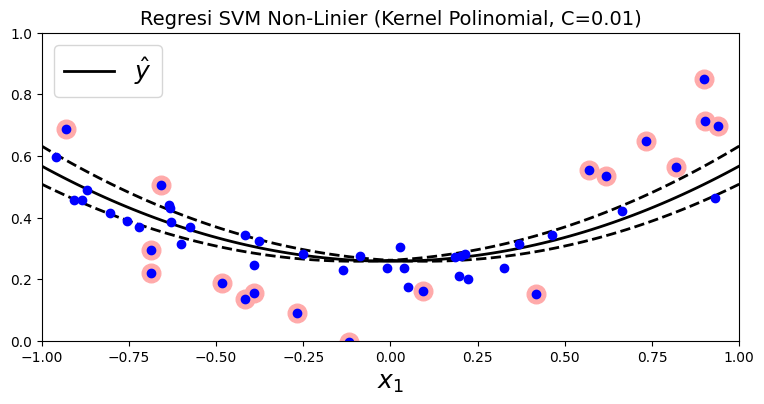


--- Selesai Reproduksi Kode Chapter 5 ---


In [7]:
# -*- coding: utf-8 -*-
"""
Chapter 5: Support Vector Machines - Notebook Reproduksi Kode

Bab ini mengeksplorasi Support Vector Machines (SVM), model yang kuat dan serbaguna
untuk klasifikasi linier dan non-linier, regresi, dan deteksi outlier.

Kita akan melihat:
- Klasifikasi SVM Linier (Hard Margin & Soft Margin)
- Klasifikasi SVM Non-Linier (Polynomial Kernel, Gaussian RBF Kernel)
- Regresi SVM
- Konsep dasar "Under the Hood" yang mendasari SVM
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.datasets import make_moons, make_blobs

# Fungsi pembantu untuk memplot batas keputusan (dari buku)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Pada batas keputusan, w0*x0 + w1*x1 + b = 0
    # Jadi, x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # FIX: Tambahkan pengecekan untuk support_vectors_ karena LinearSVC tidak memilikinya
    if hasattr(svm_clf, 'support_vectors_'):
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    else:
        # Untuk LinearSVC, kita bisa menunjukkan margin tanpa menyorot SVs
        # karena SVs tidak terekspos secara langsung.
        pass # Untuk saat ini, kita biarkan saja tanpa plot SVs jika tidak ada

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

def plot_regression_predictions(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, svm_reg.predict(x1s + svm_reg.epsilon), "k--", linewidth=2)
    plt.plot(x1s, svm_reg.predict(x1s - svm_reg.epsilon), "k--", linewidth=2)

    # FIX: Menggunakan svm_reg.support_ (indeks) daripada svm_reg.support_vectors_ (data itu sendiri)
    if hasattr(svm_reg, 'support_'): # Periksa atribut 'support_' (untuk SVR)
        plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    else:
        pass # Lewati plotting support vectors jika tidak tersedia (misal untuk LinearSVR)

    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

# --- 1. Klasifikasi SVM Linier ---

# Memuat dataset Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # 1 jika Iris virginica, else 0

# Pipeline untuk penskalaan dan LinearSVC
print("--- Klasifikasi SVM Linier ---")
print("Melatih LinearSVC (C=1, hard margin) untuk deteksi Iris virginica...")
# FIX: Mengubah dual=False menjadi dual=True agar kompatibel dengan loss="hinge"
lin_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42, dual=True, max_iter=2000))
])
lin_svm_clf.fit(X, y)
print("LinearSVC C=1 berhasil dilatih.")

print("Melatih LinearSVC (C=100, soft margin) untuk deteksi Iris virginica...")
# FIX: Mengubah dual=False menjadi dual=True agar kompatibel dengan loss="hinge"
lin_svm_clf_soft = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42, dual=True, max_iter=2000))
])
lin_svm_clf_soft.fit(X, y)
print("LinearSVC C=100 berhasil dilatih.")

# Membuat prediksi
print(f"Prediksi untuk petal [5.5, 1.7] (Iris virginica): {lin_svm_clf.predict([[5.5, 1.7]])}")

# Plot batas keputusan
scaler_lin_svm = lin_svm_clf.named_steps["scaler"]
linear_svc_clf = lin_svm_clf.named_steps["linear_svc"]
linear_svc_clf_soft = lin_svm_clf_soft.named_steps["linear_svc"]

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Bukan Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Iris virginica")
plot_svc_decision_boundary(linear_svc_clf, 4, 6)
plt.xlabel("Panjang Petal", fontsize=14)
plt.ylabel("Lebar Petal", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("LinearSVC, C=1 (Margin Lebih Lebar, Pelanggaran Lebih Banyak)", fontsize=12)
plt.axis([4, 6, 0.8, 2.8])
plt.grid(True)

plt.subplot(122)
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Bukan Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Iris virginica")
plot_svc_decision_boundary(linear_svc_clf_soft, 4, 6)
plt.xlabel("Panjang Petal", fontsize=14)
plt.title("LinearSVC, C=100 (Margin Lebih Sempit, Lebih Sedikit Pelanggaran)", fontsize=12)
plt.axis([4, 6, 0.8, 2.8])
plt.grid(True)

plt.suptitle("Klasifikasi SVM Linier (Pengaruh Parameter C)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 2. Klasifikasi SVM Non-Linier ---

# a. Menggunakan Fitur Polinomial (PolynomialFeatures + LinearSVC)
# Dataset moons (non-linier)
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

print("\n--- Klasifikasi SVM Non-Linier (PolynomialFeatures + LinearSVC) ---")
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=2000, dual=True)) # dual=True
])
polynomial_svm_clf.fit(X_moons, y_moons)
print("SVM dengan fitur polinomial berhasil dilatih.")

# Fungsi plot batas keputusan untuk dataset moons (menggunakan kontur)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_plot = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_plot).reshape(x0.shape)
    y_decision = clf.decision_function(X_plot).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(8, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Klasifikasi SVM Non-Linier dengan Fitur Polinomial", fontsize=14)
plt.show()


# b. Menggunakan Kernel Polinomial (SVC dengan kernel="poly")
print("\n--- Klasifikasi SVM Non-Linier (Kernel Polinomial) ---")
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42))
])
print("Melatih SVC dengan kernel polinomial degree 3...")
poly_kernel_svm_clf.fit(X_moons, y_moons)
print("SVC dengan kernel polinomial berhasil dilatih.")

plt.figure(figsize=(8, 6))
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Klasifikasi SVM Non-Linier (Kernel Polinomial, Degree 3)", fontsize=14)
plt.show()

# Contoh lain dengan degree lebih tinggi
print("Melatih SVC dengan kernel polinomial degree 10, C=100...")
poly_kernel_svm_clf_high_deg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=100, random_state=42))
])
poly_kernel_svm_clf_high_deg.fit(X_moons, y_moons)
print("SVC dengan kernel polinomial degree 10 berhasil dilatih.")

plt.figure(figsize=(8, 6))
plot_predictions(poly_kernel_svm_clf_high_deg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Klasifikasi SVM Non-Linier (Kernel Polinomial, Degree 10)", fontsize=14)
plt.show()


# c. Menggunakan Kernel Gaussian RBF (SVC dengan kernel="rbf")
print("\n--- Klasifikasi SVM Non-Linier (Kernel Gaussian RBF) ---")
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001, random_state=42)) # gamma rendah, C rendah
])
print("Melatih SVC dengan kernel RBF (gamma=5, C=0.001)...")
rbf_kernel_svm_clf.fit(X_moons, y_moons)
print("SVC dengan kernel RBF berhasil dilatih.")

plt.figure(figsize=(8, 6))
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])
plt.title("Klasifikasi SVM Non-Linier (Kernel RBF, Gamma=5, C=0.001)", fontsize=14)
plt.show()

# Contoh lain dengan gamma dan C berbeda (dari buku)
gammas = [0.1, 5]
Cs = [0.001, 1000]

plt.figure(figsize=(10.5, 7))
for i, gamma in enumerate(gammas):
    for j, C in enumerate(Cs):
        ax = plt.subplot(len(gammas), len(Cs), i * len(Cs) + j + 1)
        rbf_kernel_svm_clf_g_c = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C, random_state=42))
        ])
        rbf_kernel_svm_clf_g_c.fit(X_moons, y_moons)

        plot_predictions(rbf_kernel_svm_clf_g_c, [-1.5, 2.5, -1, 1.5])
        plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])

        ax.set_title(f"gamma={gamma}, C={C}", fontsize=12)
        if i == 1:
            ax.set_xlabel("")
        if j == 0:
            ax.set_ylabel("")

plt.suptitle("Klasifikasi SVM Non-Linier (Pengaruh Gamma dan C pada Kernel RBF)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- 3. Regresi SVM ---

# a. Regresi SVM Linier (LinearSVR)
print("\n--- Regresi SVM Linier ---")
# Data linier sintetis (sedikit noise)
np.random.seed(42)
X_svr_linear = 2 * np.random.rand(50, 1)
y_svr_linear = 4 + 3 * X_svr_linear + np.random.randn(50, 1)

# Pipeline untuk penskalaan dan LinearSVR
lin_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(epsilon=1.5, random_state=42)) # epsilon = lebar "street"
])
print("Melatih LinearSVR (epsilon=1.5)...")
lin_svr.fit(X_svr_linear, y_svr_linear.ravel()) # .ravel() untuk y 1D
print("LinearSVR berhasil dilatih.")

# Plot hasil regresi
lin_svr_model = lin_svr.named_steps["linear_svr"]
plt.figure(figsize=(9, 4))
plot_regression_predictions(lin_svr_model, X_svr_linear, y_svr_linear.ravel(), [0, 2, 3, 11])
plt.title("Regresi SVM Linier (Epsilon=1.5)", fontsize=14)
plt.show()

# Contoh LinearSVR dengan epsilon yang lebih kecil
lin_svr_small_epsilon = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svr", LinearSVR(epsilon=0.5, random_state=42))
])
print("Melatih LinearSVR (epsilon=0.5)...")
lin_svr_small_epsilon.fit(X_svr_linear, y_svr_linear.ravel())
print("LinearSVR dengan epsilon kecil berhasil dilatih.")

lin_svr_model_small_epsilon = lin_svr_small_epsilon.named_steps["linear_svr"]
plt.figure(figsize=(9, 4))
plot_regression_predictions(lin_svr_model_small_epsilon, X_svr_linear, y_svr_linear.ravel(), [0, 2, 3, 11])
plt.title("Regresi SVM Linier (Epsilon=0.5)", fontsize=14)
plt.show()


# b. Regresi SVM Non-Linier (SVR dengan kernel="poly")
print("\n--- Regresi SVM Non-Linier (Kernel Polinomial) ---")
# Data non-linier sintetis
np.random.seed(42)
X_svr_poly = 2 * np.random.rand(50, 1) - 1 # Dari -1 sampai 1
y_svr_poly = 0.2 + 0.1 * X_svr_poly + 0.5 * X_svr_poly**2 + np.random.randn(50, 1) * 0.1

# SVR dengan kernel polinomial
poly_svr = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
print("Melatih SVR (kernel='poly', degree=2, C=100, epsilon=0.1)...")
poly_svr.fit(X_svr_poly, y_svr_poly.ravel())
print("SVR dengan kernel polinomial berhasil dilatih.")

plt.figure(figsize=(9, 4))
plot_regression_predictions(poly_svr, X_svr_poly, y_svr_poly.ravel(), [-1, 1, 0, 1])
plt.title("Regresi SVM Non-Linier (Kernel Polinomial)", fontsize=14)
plt.show()

# Contoh SVR dengan C yang lebih kecil (lebih banyak regularisasi)
poly_svr_reg = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
print("Melatih SVR (kernel='poly', degree=2, C=0.01, epsilon=0.1)...")
poly_svr_reg.fit(X_svr_poly, y_svr_poly.ravel())
print("SVR dengan kernel polinomial (C rendah) berhasil dilatih.")

plt.figure(figsize=(9, 4))
plot_regression_predictions(poly_svr_reg, X_svr_poly, y_svr_poly.ravel(), [-1, 1, 0, 1])
plt.title("Regresi SVM Non-Linier (Kernel Polinomial, C=0.01)", fontsize=14)
plt.show()

print("\n--- Selesai Reproduksi Kode Chapter 5 ---")